# Reporte del analisis de "Synergy Logistics Database"
## Emtech Institute
### 7 de Octubre de 2021

*Elaborado por: Efren Pazzi Manzano*

En el siguiente informe se quiere manifestar cual de las siguientes opciones es la mejor estrategia para la empresa Synergy Logitics
1. Concentrarse en las 10 rutas más demandadas
2. Concentrarse en los 3 medios de transporte mas usados 
3. Concentrarse en los pasies que representan el 80% del valor total

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns

data = pd.read_csv("synergy_logistics_database.csv", index_col="register_id")

La información en la base de datos son las intermediaciones de la empresa. Importaciones y Exportaciones con distintos paises, asi como los medios de trasporte y el valor de cada ruta. 

In [2]:
df= pd.DataFrame(data)

## 1. Las 10 rutas mas demandadas

Una ruta es la direccion, sea exportacion o importacion, mas el paises de origen, el pais de destino, y finalmente el medio utilizado

In [3]:
rutas = df[['direction','origin','destination','transport_mode','total_value']]
rutasunicas = rutas.groupby(['direction','origin','destination','transport_mode']).count()
rutasunicas = rutasunicas.rename(columns = {'total_value':'count'})

In [4]:
rutasunicas = rutasunicas.sort_values(by='count', ascending=False)
rutasunicas.head(10)

count
direction origin      destination transport_mode       
Exports   South Korea Vietnam     Sea               497
          USA         Netherlands Sea               436
          Netherlands Belgium     Road              374
          China       Mexico      Air               330
          Japan       Brazil      Sea               306
          Germany     France      Road              299
          South Korea Japan       Sea               279
Imports   Singapore   Thailand    Sea               273
Exports   Australia   Singapore   Sea               273
          Canada      Mexico      Rail              261

*La tabla anterior son las 10 mas usadas*

### Dentro de las exportaciones ,las 10 rutas más demandas

In [5]:
rutasExp = rutasunicas.xs('Exports')

<AxesSubplot:xlabel='Ruta', ylabel='count'>

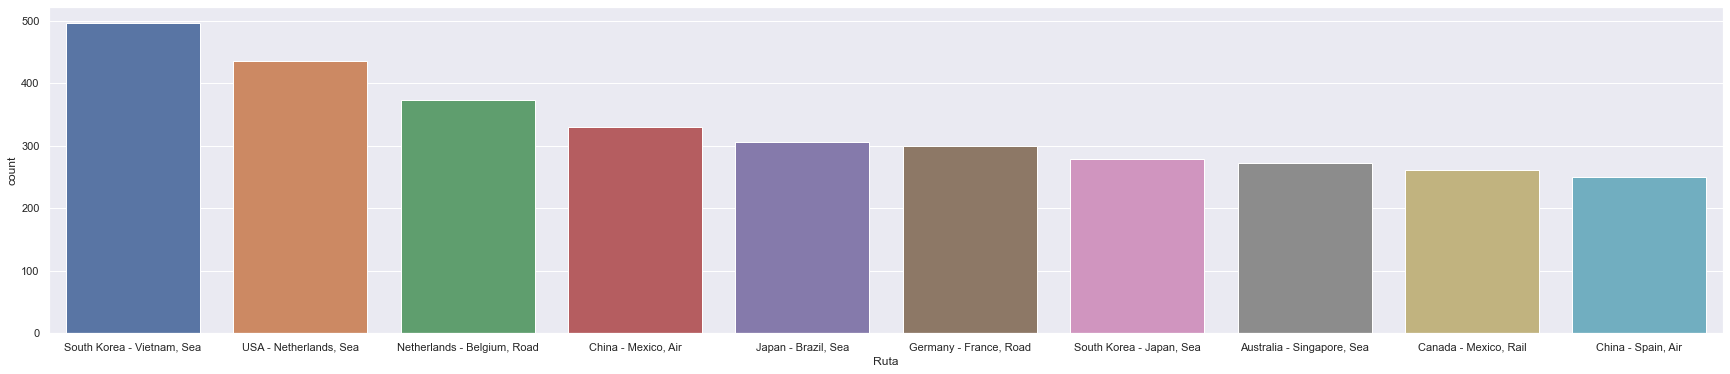

In [6]:
rutasExp['Ruta'] = rutasExp.index.to_list()
def nombre_ruta(lista):
    nombre = f'{lista[0]} - {lista[1]}, {lista[2]}'
    return nombre

rutasExp['Ruta'] = rutasExp['Ruta'].apply(nombre_ruta)

sns.set(rc={"figure.figsize": (30, 6)}) 
sns.barplot(data=rutasExp.head(10), x='Ruta', y='count')

*las 10 exportaciones mas demandadas*

### Dentro de las importaciones, las rutas mas demandadas

<AxesSubplot:xlabel='Ruta', ylabel='count'>

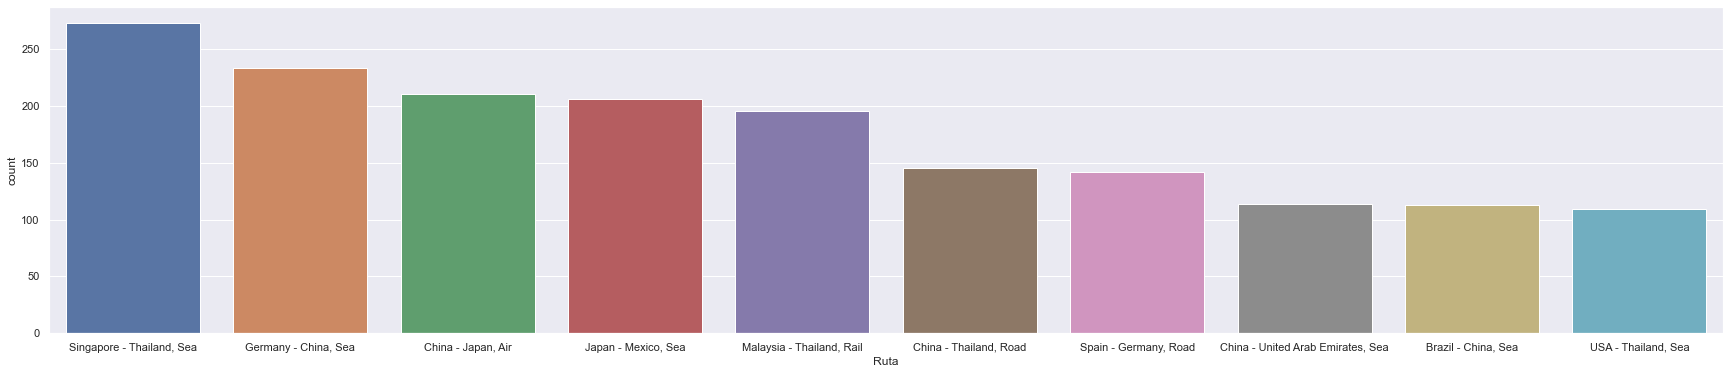

In [7]:
rutasImp = rutasunicas.xs('Imports')
rutasImp ['Ruta'] = rutasImp.index.to_list()
rutasImp['Ruta'] = rutasImp['Ruta'].apply(nombre_ruta)
sns.set(rc={"figure.figsize": (30, 6)}) 
sns.barplot(data=rutasImp.head(10), x='Ruta', y='count')

*las 10 importaciones mas demandadas*

#### ¿Viable 1ra opcion?
**No es viable**, como podemos observar solo enfocarse en las 10 rutas más demandas se perderian grandes ingresos, ya que se tienen 215 rutas, solo 20 de ellas son grandes volumenes de importacion y exportaciones.

## 2.- Medios de trasporte

In [8]:
medios = df[['direction','transport_mode','total_value']]
losMedios = medios.groupby(['direction','transport_mode']).count()
losMedios = losMedios.rename(columns = {'total_value':'Viajes'})
losMedios = losMedios.sort_values(by='Viajes', ascending=False)

In [9]:
losMediosExp = losMedios.xs('Exports')
losMediosExp['Medio'] = losMediosExp.index
losMediosImp = losMedios.xs('Imports')
losMediosImp['Medio'] = losMediosImp.index

### Exportaciones

<AxesSubplot:xlabel='Medio', ylabel='Viajes'>

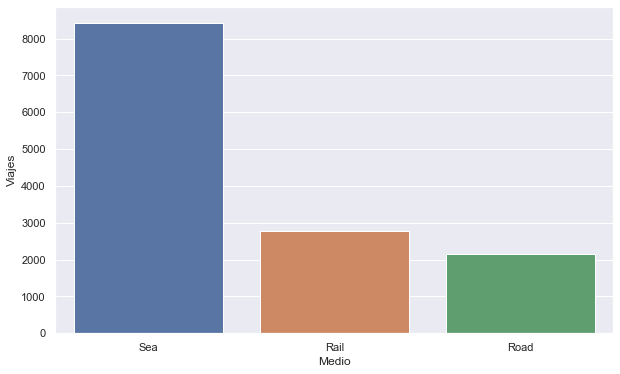

In [10]:
sns.set(rc={"figure.figsize": (10, 6)}) 
sns.barplot(data=losMediosExp.head(3), x="Medio", y='Viajes')

*Medios más usados en exportaciones*

### Importaciones

<AxesSubplot:xlabel='Medio', ylabel='Viajes'>

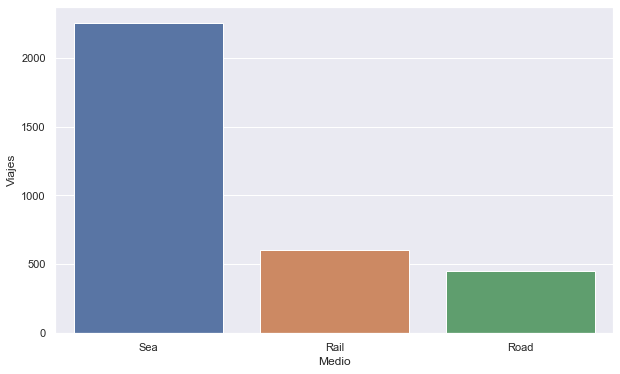

In [11]:
sns.set(rc={"figure.figsize": (10, 6)}) 
sns.barplot(data=losMediosImp.head(3), x="Medio", y='Viajes')

*Medios más usados en importaciones*

#### ¿Viable la 2 opcion?

**Es viable** ya que los medios mas utilizados son los mismos tanto en importaciones como en exportaciones ademas el mar, es el más usado de todos.

## 3. Paises con el 80% del valor en las intermediaciones.

In [12]:
valores = df[['direction','origin','total_value']]

In [13]:
sumaValores= valores.groupby(['direction','origin']).sum()
sumaValoresExp = sumaValores.xs('Exports')
sumaValoresExp = sumaValoresExp.sort_values(by = 'total_value', ascending = False)
sumaValoresExp['Acumulado'] = sumaValoresExp['total_value'].cumsum()
sumaValoresExp['Porcentaje'] = (sumaValoresExp['Acumulado']/sumaValoresExp.iloc[-1]['Acumulado'])*100 
sumaValoresImp = sumaValores.xs('Imports')
sumaValoresImp = sumaValoresImp.sort_values(by = 'total_value', ascending = False)
sumaValoresImp['Acumulado'] = sumaValoresImp['total_value'].cumsum()
sumaValoresImp['Porcentaje'] = (sumaValoresImp['Acumulado']/sumaValoresImp.iloc[-1]['Acumulado'])*100 
sumaValoresExp['Origen'] = sumaValoresExp.index
sumaValoresImp['Origen'] = sumaValoresImp.index

### Exportaciones

<AxesSubplot:xlabel='Origen', ylabel='Porcentaje'>

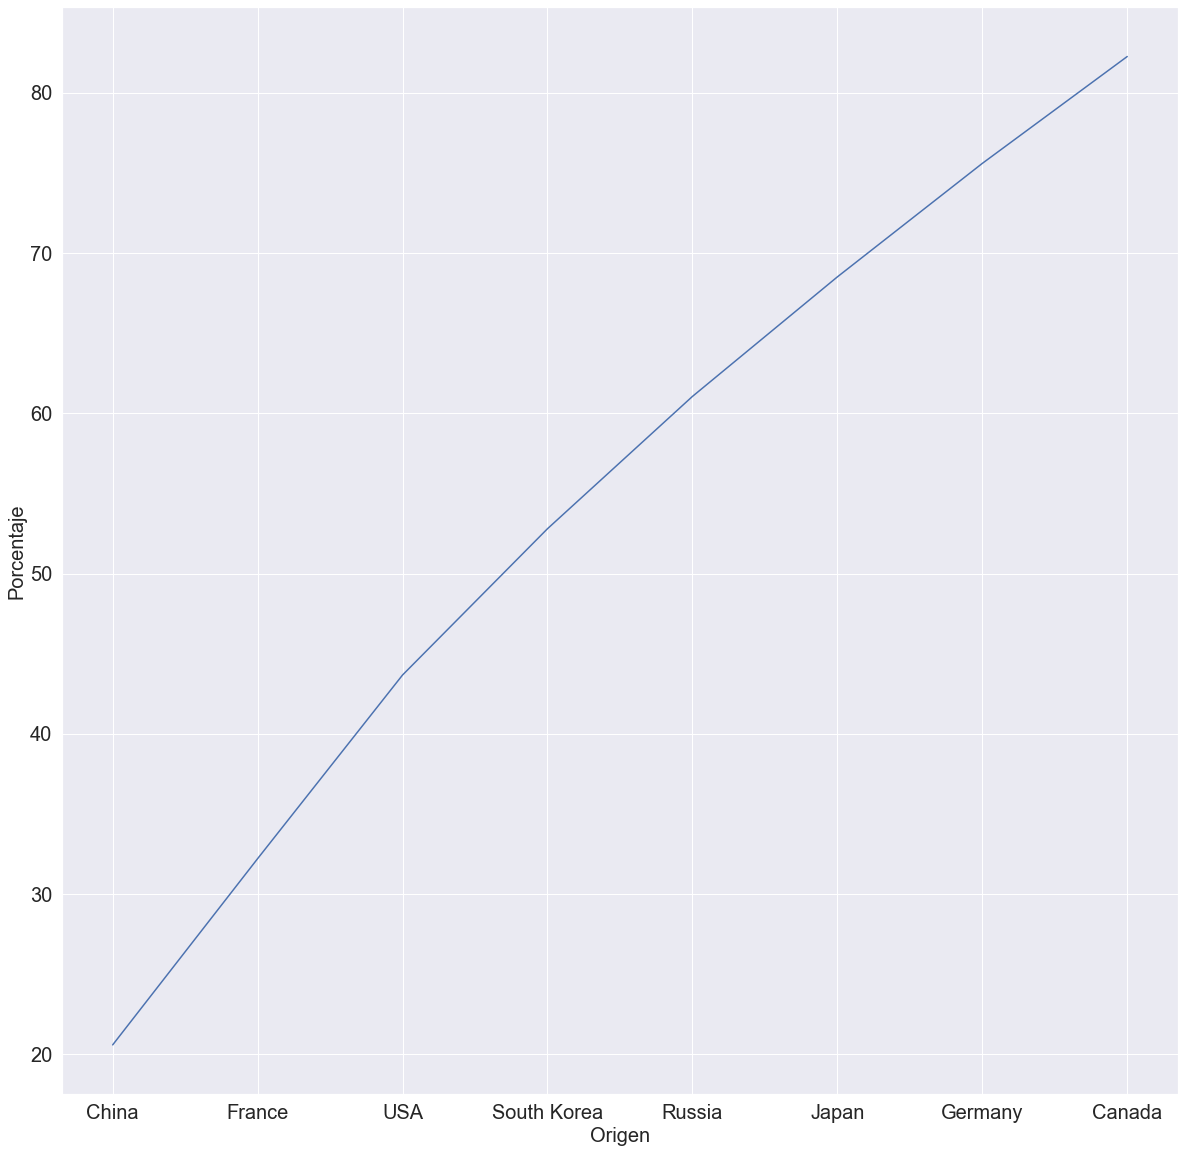

In [14]:
sns.set(rc={"figure.figsize": (20, 20), 'axes.labelsize': 20, 'xtick.labelsize' : 20, 'ytick.labelsize' : 20}) 
sns.lineplot(data=sumaValoresExp.head(8), x="Origen", y='Porcentaje')

*Suma de los porcentajes de cada pais en las exportaciones*

### Importaciones

<AxesSubplot:xlabel='Origen', ylabel='Porcentaje'>

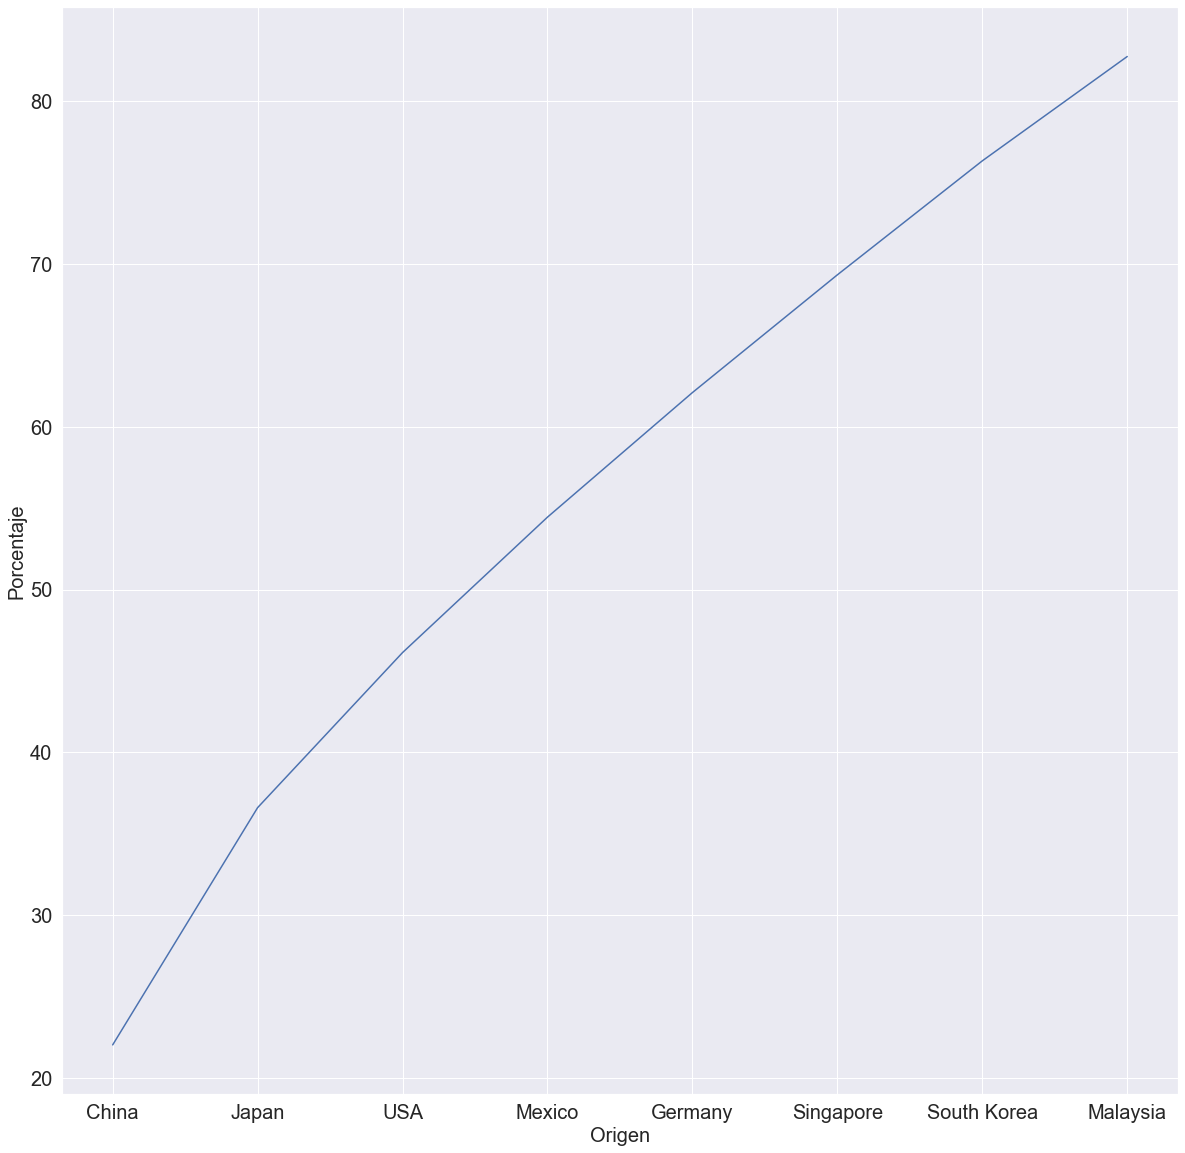

In [15]:
sns.set(rc={"figure.figsize": (20, 20), 'axes.labelsize': 20, 'xtick.labelsize' : 20, 'ytick.labelsize' : 20}) 
sns.lineplot(data=sumaValoresImp.head(8), x="Origen", y='Porcentaje')

*Suma de los porcentajes de cada pais en las importaciones*

#### ¿Viable la 3 opción?

**No es viable** primero porque no son los mismo paises en las exportaciones e importaciones. Nuestros medios de trasporte solo irian en una sola dirección

## Conclusión 

La mejor opción a serguir es la número 2, concentrase en el medio de transporte maritimo y en los siguentes 2 mas frecuentes mantendra la mayor cantidad de las intermediaciones, sin perder paises en los que se tiene exportacion e importacion.